# Udacity Machine Learning Nano Degree 

### Starbucks Capstone Challenge - Data Exploration

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import math
%matplotlib inline

In [2]:
# read in the json files
portfolio = pd.read_csv('data/portfolio.csv')
profile = pd.read_csv('data/profile.csv')
transcript = pd.read_csv('data/transcript.csv')

## Step 1 - Data preparation

### portfolio


In [3]:
portfolio.shape


(10, 7)

In [4]:
portfolio


,Unnamed: 0,channels,difficulty,duration,id,offer_type,reward
0,0,"['email', 'mobile', 'social']",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,1,"['web', 'email', 'mobile', 'social']",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,2,"['web', 'email', 'mobile']",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,3,"['web', 'email', 'mobile']",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,4,"['web', 'email']",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,5,"['web', 'email', 'mobile', 'social']",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,6,"['web', 'email', 'mobile', 'social']",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,7,"['email', 'mobile', 'social']",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,8,"['web', 'email', 'mobile', 'social']",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,9,"['web', 'email', 'mobile']",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


The portfolio dataset contain 10 rows and 6 columns

In [5]:
portfolio.drop(columns=['Unnamed: 0'])

,channels,difficulty,duration,id,offer_type,reward
0,"['email', 'mobile', 'social']",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"['web', 'email', 'mobile', 'social']",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"['web', 'email', 'mobile']",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"['web', 'email', 'mobile']",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"['web', 'email']",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"['web', 'email', 'mobile', 'social']",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"['web', 'email', 'mobile', 'social']",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"['email', 'mobile', 'social']",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"['web', 'email', 'mobile', 'social']",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"['web', 'email', 'mobile']",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


## Profile

This dataset has information about customers.

In [6]:
profile.shape


(17000, 6)

In [7]:
profile.drop('Unnamed: 0', 1, inplace=True)

In [8]:
len(profile['id'].unique())

17000

- There are 17000 unique client Ids, there is no duduplicated clients profiles.
- Looks like there are some missing values in `gender` and `income`
- We should convert `became_member_on` into a date feature

In [9]:
profile['member_since'] = pd.to_datetime(profile['became_member_on'].astype('str')).dt.date
profile.head()

,age,became_member_on,gender,id,income,member_since
0,118,20170212,NaN,68be06ca386d4c31939f3a4f0e3dd783,NaN,2017-02-12
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017-07-15
2,118,20180712,NaN,38fe809add3b4fcf9315a9694bb96ff5,NaN,2018-07-12
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017-05-09
4,118,20170804,NaN,a03223e636434f42ac4c3df47e8bac43,NaN,2017-08-04


In [10]:
profile.drop('became_member_on', 1, inplace=True)
profile.head()

,age,gender,id,income,member_since
0,118,NaN,68be06ca386d4c31939f3a4f0e3dd783,NaN,2017-02-12
1,55,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017-07-15
2,118,NaN,38fe809add3b4fcf9315a9694bb96ff5,NaN,2018-07-12
3,75,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017-05-09
4,118,NaN,a03223e636434f42ac4c3df47e8bac43,NaN,2017-08-04


Since gender is not a numeric value, make sense to use it to describe `age` and `income` (numeric values) 

In [11]:
profile.loc[profile['gender'].isnull()].describe()

,age,income
count,2175.0,0.0
mean,118.0,NaN
std,0.0,NaN
min,118.0,NaN
25%,118.0,NaN
50%,118.0,NaN
75%,118.0,NaN
max,118.0,NaN


It looks like for the records where `gender` is null, `income` is always null and `age` is always 118, we can proceed to drop those

In [12]:
profile = profile.loc[profile['gender'].isnull() == False]
profile.describe()

,age,income
count,14825.000000,14825.000000
mean,54.393524,65404.991568
std,17.383705,21598.299410
min,18.000000,30000.000000
25%,42.000000,49000.000000
50%,55.000000,64000.000000
75%,66.000000,80000.000000
max,101.000000,120000.000000


After the clean, we have 14825 records

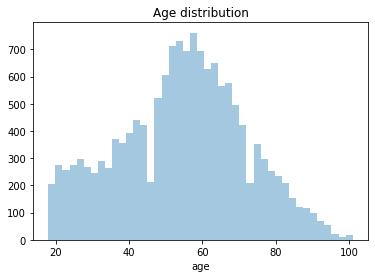

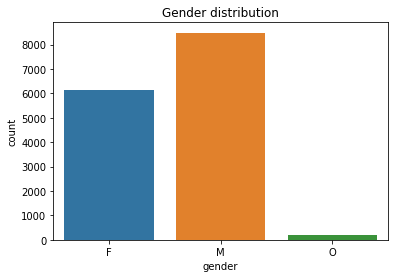

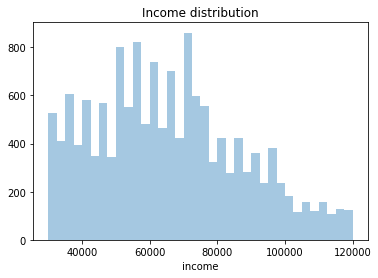

In [13]:
plt.title("Age distribution")
sns.distplot(a=profile['age'], kde=False)
plt.show()

plt.title("Gender distribution")
sns.countplot(x='gender', data=profile)
plt.show()

plt.title("Income distribution")
sns.distplot(a=profile['income'], kde=False)
plt.show()

In [14]:
profile['gender'].value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

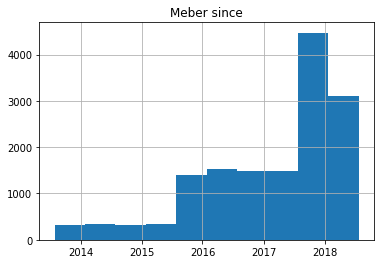

Members started on: 2013-07-29 - last member on 2018-07-26 


In [15]:

plt.title("Meber since")
profile['member_since'].hist()
plt.show()

print("Members started on: {} - last member on {} ".format(profile['member_since'].min(), profile['member_since'].max()))

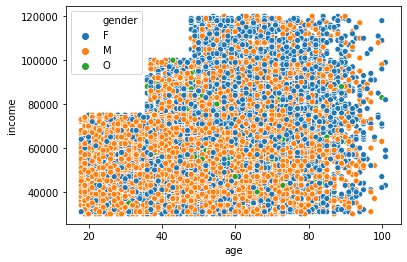

In [16]:
sns.scatterplot(x=profile['age'], y=profile['income'], hue=profile['gender'])

Things to notice:

- there are a third gender o with very fwe records
- The age has a normal distribution, while income has irregular distribution
- The users are quite new members, the higher part of customers' memberships are concentrated from the last part of 2017 beginning of 2018
- The age income distribution is quite tight (no outliers)

## Transcript 

This dataframe contains the list of all actions when received offers and when the transaction hapen.

### Data preparation:

Analyze the customer journey, from receiving the offer to the eventual transaction.

In [17]:
transcript.shape

(306534, 5)

In [18]:
transcript.head()

,Unnamed: 0,event,person,time,value
0,0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [19]:
transcript.drop('Unnamed: 0', 1, inplace=True)

In [20]:
transcript.head(20)

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
5,offer received,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
6,offer received,c4863c7985cf408faee930f111475da3,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,{'offer id': '3f207df678b143eea3cee63160fa8bed'}
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
9,offer received,31dda685af34476cad5bc968bdb01c53,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}


In [21]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [22]:
transcript['value'].value_counts()

{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}    14983
{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}    14924
{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}    14891
{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}    14835
{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}    14374
                                                    ...  
{'amount': 779.29}                                      1
{'amount': 43.4}                                        1
{'amount': 943.33}                                      1
{'amount': 460.55}                                      1
{'amount': 41.93}                                       1
Name: value, Length: 5121, dtype: int64

...

In [23]:
import ast

keys = transcript['value'].apply(lambda x: str(list(ast.literal_eval(x).keys())))
#print(keys)

In [24]:
keys.value_counts()

['amount']                138953
['offer id']              134002
['offer_id', 'reward']     33579
Name: value, dtype: int64

- `offer_id` key should be an offer received or viewed
- `offer_id`, `reward` should be an offer completed
- `amount` should be a transaction made

We should create new feature for each of these values and drop the `value` column.

In [25]:
transcript['value'] = transcript['value'].apply(lambda x: ast.literal_eval(x))

In [26]:
for col_name in ['amount', 'reward']:
    transcript[col_name] = transcript['value'].apply(lambda x: x[col_name] if col_name in x else None)
    
transcript['offer_id'] = transcript['value'].apply(lambda x: x['offer_id'] if 'offer_id' in x \
                                                   else (x['offer id'] if 'offer id' in x else None))

In [27]:
transcript.head()

,event,person,time,value,amount,reward,offer_id
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0


In [28]:
transcript.drop('value', 1, inplace=True)

Lest have a look at `time` feature

In [29]:
transcript['time'].describe()

count    306534.000000
mean        366.382940
std         200.326314
min           0.000000
25%         186.000000
50%         408.000000
75%         528.000000
max         714.000000
Name: time, dtype: float64

The time feature ranges from 0 to 714 hours or 29.75 days.

Lets check how many records per customer

In [30]:
records_per_customer = transcript.groupby('person')['time'].count()
records_per_customer.sort_values(ascending=False).head()

person
94de646f7b6041228ca7dec82adb97d2    51
8dbfa485249f409aa223a2130f40634a    49
79d9d4f86aca4bed9290350fb43817c2    48
d0a80415b84c4df4908b8403b19765e3    48
5e60c6aa3b834e44b822ea43a3efea26    48
Name: time, dtype: int64

In [31]:
records_per_customer.describe()

count    17000.000000
mean        18.031412
std          6.849595
min          1.000000
25%         13.000000
50%         17.000000
75%         23.000000
max         51.000000
Name: time, dtype: float64

In [32]:
one_person_journey = transcript.loc[transcript['person'] == records_per_customer.index[0]].sort_values('time')
one_person_journey

,event,person,time,amount,reward,offer_id
55972,offer received,0009655768c64bdeb2e877511632db8f,168,NaN,NaN,5a8bc65990b245e5a138643cd4eb9837
77705,offer viewed,0009655768c64bdeb2e877511632db8f,192,NaN,NaN,5a8bc65990b245e5a138643cd4eb9837
89291,transaction,0009655768c64bdeb2e877511632db8f,228,22.16,NaN,None
113605,offer received,0009655768c64bdeb2e877511632db8f,336,NaN,NaN,3f207df678b143eea3cee63160fa8bed
139992,offer viewed,0009655768c64bdeb2e877511632db8f,372,NaN,NaN,3f207df678b143eea3cee63160fa8bed
153401,offer received,0009655768c64bdeb2e877511632db8f,408,NaN,NaN,f19421c1d4aa40978ebb69ca19b0e20d
168412,transaction,0009655768c64bdeb2e877511632db8f,414,8.57,NaN,None
168413,offer completed,0009655768c64bdeb2e877511632db8f,414,NaN,5.0,f19421c1d4aa40978ebb69ca19b0e20d
187554,offer viewed,0009655768c64bdeb2e877511632db8f,456,NaN,NaN,f19421c1d4aa40978ebb69ca19b0e20d
204340,offer received,0009655768c64bdeb2e877511632db8f,504,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4


In [33]:
relation_event_person = transcript.groupby(['person', 'event'])['time'].count()
relation_event_person.head(30)

person                            event          
0009655768c64bdeb2e877511632db8f  offer completed     3
                                  offer received      5
                                  offer viewed        4
                                  transaction         8
00116118485d4dfda04fdbaba9a87b5c  offer received      2
                                  offer viewed        2
                                  transaction         3
0011e0d4e6b944f998e987f904e8c1e5  offer completed     3
                                  offer received      5
                                  offer viewed        5
                                  transaction         5
0020c2b971eb4e9188eac86d93036a77  offer completed     3
                                  offer received      5
                                  offer viewed        3
                                  transaction         8
0020ccbbb6d84e358d3414a3ff76cffd  offer completed     3
                                  offer received      

It looks like there is not clear relationship between offer viewed and completed, an offer can be viewed but not completed, and the other way around

### Recreating the funnel of customer's conversion

In [34]:
offer_received_viewed = pd.merge(transcript.loc[transcript['event'] == 'offer received', ['person', 'offer_id', 'time']],
                 transcript.loc[transcript['event'] == 'offer viewed', ['person', 'offer_id', 'time']],
                 on=['person', 'offer_id'], how='left', suffixes=['_received', '_viewed'])

offer_received_viewed.head()

,person,offer_id,time_received,time_viewed
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,6.0
1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,6.0
2,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,624.0
3,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,0,18.0
4,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,0,12.0


We have to be sure to take the "reception" before the view, or when there is no view.

In [35]:
offer_received_viewed = offer_received_viewed.loc[(offer_received_viewed['time_viewed'] >= 
                                                   offer_received_viewed['time_received']) | 
                                                  (offer_received_viewed['time_viewed'].isnull())]

# We concatenate with the "missing view" dataframe portion, since aggregation results in a drop of these records
offer_received_viewed = pd.concat((offer_received_viewed.groupby(['person', 'offer_id', 'time_viewed'])
                                   .agg({'time_received': 'max'}).reset_index(),
                  offer_received_viewed.loc[offer_received_viewed['time_viewed'].isnull()]),
                  axis=0, sort=True)

offer_received_viewed.head()

,offer_id,person,time_received,time_viewed
0,3f207df678b143eea3cee63160fa8bed,0009655768c64bdeb2e877511632db8f,336,372.0
1,5a8bc65990b245e5a138643cd4eb9837,0009655768c64bdeb2e877511632db8f,168,192.0
2,f19421c1d4aa40978ebb69ca19b0e20d,0009655768c64bdeb2e877511632db8f,408,456.0
3,fafdcd668e3743c1bb461111dcafc2a4,0009655768c64bdeb2e877511632db8f,504,540.0
4,f19421c1d4aa40978ebb69ca19b0e20d,00116118485d4dfda04fdbaba9a87b5c,168,216.0


We can use the same approach for effer completed

In [36]:
offer_completed = pd.merge(offer_received_viewed,
                transcript.loc[transcript['event'] == 'offer completed', ['person', 'offer_id', 'time', 'reward']],
                on=['person', 'offer_id'], how='left').rename(columns={'time': 'time_completed'})


offer_completed.loc[(offer_completed['time_viewed'].isnull()) | (offer_completed['time_viewed'] > 
                                                                 offer_completed['time_completed']), 
                    ['time_completed', 'reward']] = (np.nan, np.nan)

offer_completed.drop_duplicates(inplace=True)

offer_completed = pd.concat(
    (offer_completed.groupby(['person', 'offer_id', 'time_completed', 'reward']).
     agg({'time_viewed': 'max', 'time_received': 'max'}).reset_index(),
     offer_completed.loc[offer_completed['time_completed'].isnull()]),
    axis=0, sort=True
)

offer_completed.head()

,offer_id,person,reward,time_completed,time_received,time_viewed
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0011e0d4e6b944f998e987f904e8c1e5,5.0,576.0,408,432.0
1,2298d6c36e964ae4a3e7e9706d1fb8c2,0011e0d4e6b944f998e987f904e8c1e5,3.0,252.0,168,186.0
2,9b98b8c7a33c4b65b9aebfe6a799e6d9,0011e0d4e6b944f998e987f904e8c1e5,5.0,576.0,504,516.0
3,4d5c57ea9a6940dd891ad53e9dbe8da0,0020c2b971eb4e9188eac86d93036a77,10.0,510.0,408,426.0
4,fafdcd668e3743c1bb461111dcafc2a4,0020c2b971eb4e9188eac86d93036a77,2.0,54.0,0,12.0


Now we can join the data with the funel of the user conversion.


In [37]:
funnel_customer_conversion = pd.merge(offer_completed,
                   transcript.loc[transcript['event'] == 'transaction', 
                   ['person', 'time', 'amount']],
                   left_on=['person', 'time_completed'], 
                   right_on=['person', 'time'], how='outer').rename(columns={'time': 'time_transaction'})

In [38]:
funnel_customer_conversion['time'] = funnel_customer_conversion['time_received']
funnel_customer_conversion.loc[funnel_customer_conversion['time'].isnull(), 'time'] = \
funnel_customer_conversion['time_transaction']

If there are offers completed twice, then remove duplicates

In [39]:
funnel_customer_conversion.sort_values(['person', 'offer_id', 'time', 'time_completed'], inplace=True)
funnel_customer_conversion = funnel_customer_conversion.drop_duplicates(['person', 'offer_id', 'time'])

funnel_customer_conversion = funnel_customer_conversion[['person', 'offer_id', 'time', 'time_received', 
                                                         'time_viewed', 'time_completed', 'time_transaction', 'amount', 
                                                         'reward']]

In [40]:
funnel_customer_conversion.shape

(188234, 9)

In [41]:
funnel_customer_conversion.head()

,person,offer_id,time,time_received,time_viewed,time_completed,time_transaction,amount,reward
24618,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,576.0,NaN,NaN,NaN,NaN,NaN
24614,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336.0,336.0,372.0,NaN,NaN,NaN,NaN
24615,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168.0,168.0,192.0,NaN,NaN,NaN,NaN
24616,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,408.0,456.0,NaN,NaN,NaN,NaN
24617,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504.0,504.0,540.0,NaN,NaN,NaN,NaN


### Merge portfolio with funnel_customer_conversion

In [42]:
merged_portfolio_df = pd.merge(funnel_customer_conversion,
               portfolio.rename(columns={'reward': 'portfolio_reward', 'id': 'offer_id'}),
               on='offer_id', how='left')

merged_portfolio_df.head()

,person,offer_id,time,time_received,time_viewed,time_completed,time_transaction,amount,reward,Unnamed: 0,channels,difficulty,duration,offer_type,portfolio_reward
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,576.0,NaN,NaN,NaN,NaN,NaN,9.0,"['web', 'email', 'mobile']",10.0,7.0,discount,2.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336.0,336.0,372.0,NaN,NaN,NaN,NaN,2.0,"['web', 'email', 'mobile']",0.0,4.0,informational,0.0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168.0,168.0,192.0,NaN,NaN,NaN,NaN,7.0,"['email', 'mobile', 'social']",0.0,3.0,informational,0.0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,408.0,456.0,NaN,NaN,NaN,NaN,8.0,"['web', 'email', 'mobile', 'social']",5.0,5.0,bogo,5.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504.0,504.0,540.0,NaN,NaN,NaN,NaN,6.0,"['web', 'email', 'mobile', 'social']",10.0,10.0,discount,2.0


In [43]:
merged_portfolio_df.drop('Unnamed: 0', 1, inplace=True)

### Merge Customer info

we dropped some customers with no information

In [44]:
merged_profile_df = pd.merge(merged_portfolio_df,
              profile.rename(columns={'id': 'person'}),
              how='inner', on='person')


In [45]:
#fill missing offer_type
merged_profile_df['offer_type'].fillna('transaction', inplace=True)
merged_profile_df.sort_values(['person', 'time', 'offer_id'], inplace=True) #sort for better readability

In [46]:
merged_profile_df.shape

(164838, 18)

In [47]:
merged_profile_df.head()

,person,offer_id,time,time_received,time_viewed,time_completed,time_transaction,amount,reward,channels,difficulty,duration,offer_type,portfolio_reward,age,gender,income,member_since
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168.0,168.0,192.0,NaN,NaN,NaN,NaN,"['email', 'mobile', 'social']",0.0,3.0,informational,0.0,33,M,72000.0,2017-04-21
5,0009655768c64bdeb2e877511632db8f,NaN,228.0,NaN,NaN,NaN,228.0,22.16,NaN,NaN,NaN,NaN,transaction,NaN,33,M,72000.0,2017-04-21
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336.0,336.0,372.0,NaN,NaN,NaN,NaN,"['web', 'email', 'mobile']",0.0,4.0,informational,0.0,33,M,72000.0,2017-04-21
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,408.0,456.0,NaN,NaN,NaN,NaN,"['web', 'email', 'mobile', 'social']",5.0,5.0,bogo,5.0,33,M,72000.0,2017-04-21
6,0009655768c64bdeb2e877511632db8f,NaN,414.0,NaN,NaN,NaN,414.0,8.57,NaN,NaN,NaN,NaN,transaction,NaN,33,M,72000.0,2017-04-21


### Save the corresponding `funnel_customer_conversion` as csv

In [48]:
merged_profile_df.to_csv('./data/funnel_customer_conversion.csv', index=False)